#             Series Methods in Pandas




In [1]:
import pandas as pd
import numpy as np


In [2]:
pd.read_csv("https://andybek.com/pandas-drinks")

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [3]:
alcohol = pd.read_csv("https://andybek.com/pandas-drinks", usecols=["country","wine_servings"], index_col="country").squeeze()

In [4]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [5]:
alcohol.size

193

In [6]:
alcohol.index.size

193

In [7]:
alcohol.shape

(193,)

In [8]:
len(alcohol)

193

In [9]:
alcohol.is_unique

False

In [10]:
alcohol.nunique(dropna=True)

71

In [12]:
alcohol.is_monotonic_decreasing

False

In [13]:
pd.Series(reversed([1,2,3,4,5,5,6])).is_monotonic_decreasing

True

In [14]:
alcohol.count()

np.int64(162)

In [15]:
alcohol.hasnans

True

In [16]:
alcohol.isnull()

,wine_servings
country,
Afghanistan,True
Albania,False
Algeria,False
Andorra,False
Angola,False
...,...
Venezuela,False
Vietnam,False
Yemen,True


In [17]:
alcohol.isna().size

193

In [18]:
len(alcohol.loc[alcohol.isnull()].index)

31

In [19]:
alcohol.isnull().sum()

np.int64(31)

In [20]:
alcohol[np.isnan].size

31

In [21]:
alcohol[alcohol.notnull()].shape

(162,)

In [22]:
wine_servings = alcohol.loc[alcohol.notnull()]

In [23]:
wine_servings

,wine_servings
country,
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
Antigua & Barbuda,45.0
...,...
Vanuatu,11.0
Venezuela,3.0
Vietnam,1.0


In [24]:
wine_servings.sum()

np.float64(8221.0)

In [25]:
country_sum = alcohol.groupby(alcohol.index).sum()
country_sum


,wine_servings
country,
Afghanistan,0.0
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,0.0


In [26]:
wine_servings[wine_servings<100]

,wine_servings
country,
Albania,54.0
Algeria,14.0
Angola,45.0
Antigua & Barbuda,45.0
Armenia,11.0
...,...
Vanuatu,11.0
Venezuela,3.0
Vietnam,1.0


In [27]:
alcohol.dropna()

,wine_servings
country,
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
Antigua & Barbuda,45.0
...,...
Vanuatu,11.0
Venezuela,3.0
Vietnam,1.0


In [28]:
alcohol

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [29]:
alcohol.fillna(100,inplace=False)

,wine_servings
country,
Afghanistan,100.0
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,100.0


In [30]:
alcohol.describe()

,wine_servings
count,162.000000
mean,50.746914
std,76.134917
min,1.000000
25%,3.000000
50%,11.500000
75%,61.250000
max,339.000000


<Axes: >

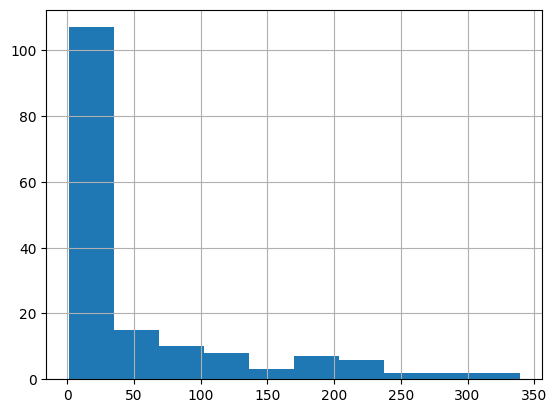

In [31]:
alcohol.hist()

In [32]:
iqr = alcohol.quantile(0.75) - alcohol.quantile(0.25)

In [33]:
iqr

np.float64(58.25)

<Axes: >

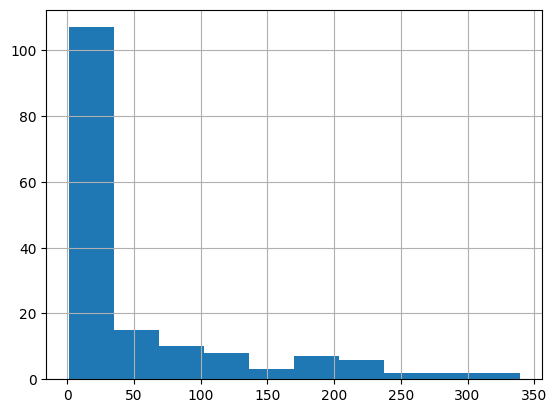

In [34]:
wine_servings.hist()

In [35]:
alcohol.max()

339.0

In [36]:
alcohol[alcohol==alcohol.max()].index[0]

'Portugal'

In [37]:
alcohol.idxmax

<bound method Series.idxmax of country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64>

In [38]:
alcohol.idxmax()

'Portugal'

In [39]:
alcohol.idxmin()

'Brunei'

In [40]:
alcohol[alcohol==alcohol.min()]

,wine_servings
country,
Brunei,1.0
Cambodia,1.0
Canada,1.0
Central African Republic,1.0
Chad,1.0
Comoros,1.0
DR Congo,1.0
Egypt,1.0
Fiji,1.0


Sorting a Series

In [41]:
alcohol.sort_values(ascending=False,na_position="first")

,wine_servings
country,
Afghanistan,NaN
Bangladesh,NaN
Bhutan,NaN
Burundi,NaN
North Korea,NaN
...,...
Nicaragua,1.0
Thailand,1.0
Solomon Islands,1.0


In [42]:
alcohol.nlargest(10)

,wine_servings
country,
Portugal,339.0
Andorra,312.0
Denmark,278.0
Slovenia,276.0
Luxembourg,271.0
Croatia,254.0
Italy,237.0
Equatorial Guinea,233.0
Argentina,221.0


In [43]:
alcohol.nsmallest(10)

,wine_servings
country,
Brunei,1.0
Cambodia,1.0
Canada,1.0
Central African Republic,1.0
Chad,1.0
Comoros,1.0
DR Congo,1.0
Egypt,1.0
Fiji,1.0


In [44]:
alcohol.sort_index(ascending=False)

,wine_servings
country,
Zimbabwe,4.0
Zambia,4.0
Yemen,NaN
Vietnam,1.0
Venezuela,3.0
...,...
Angola,45.0
Andorra,312.0
Algeria,14.0


In [45]:
fifty_plus = alcohol[alcohol>50]

In [46]:
fifty_plus

,wine_servings
country,
Albania,54.0
Andorra,312.0
Argentina,221.0
Australia,212.0
Austria,191.0
Bahamas,51.0
Belgium,212.0
Bulgaria,94.0
Chile,172.0


In [47]:
fifty_plus.nsmallest(20)

,wine_servings
country,
Bahamas,51.0
Seychelles,51.0
Albania,54.0
Lithuania,56.0
Poland,56.0
Estonia,59.0
Gabon,59.0
Latvia,62.0
St. Lucia,71.0


In [48]:
fifty_plus.nsmallest(20).mean()

np.float64(74.25)

In [49]:
fifty_plus.nsmallest(20).median()

73.5

In [50]:
fifty_plus.nsmallest(20).std()

19.07292100831631

In [51]:
alcohol.var()

5796.52561153286

In [52]:
alcohol.std()

76.13491716376173

In [54]:
#Cumulative sum of Series
alcohol.cumsum(skipna=True)

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,68.0
Andorra,380.0
Angola,425.0
...,...
Venezuela,8212.0
Vietnam,8213.0
Yemen,NaN


In [56]:
#cumulative maximum
alcohol.cummax()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,54.0
Andorra,312.0
Angola,312.0
...,...
Venezuela,339.0
Vietnam,339.0
Yemen,NaN


In [57]:
#pairwise difference of a Series
alcohol.diff()

,wine_servings
country,
Afghanistan,NaN
Albania,NaN
Algeria,-40.0
Andorra,298.0
Angola,-267.0
...,...
Venezuela,-8.0
Vietnam,-2.0
Yemen,NaN


In [58]:
alcohol.diff(periods=2)

,wine_servings
country,
Afghanistan,NaN
Albania,NaN
Algeria,NaN
Andorra,258.0
Angola,31.0
...,...
Venezuela,-5.0
Vietnam,-10.0
Yemen,NaN


In [59]:
alcohol.diff(periods=-1)

,wine_servings
country,
Afghanistan,NaN
Albania,40.0
Algeria,-298.0
Andorra,267.0
Angola,0.0
...,...
Venezuela,2.0
Vietnam,NaN
Yemen,NaN


In [61]:
mini_alc = alcohol[:10]
mini_alc

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
Antigua & Barbuda,45.0
Argentina,221.0
Armenia,11.0
Australia,212.0


In [66]:
for i in mini_alc.index:
  print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [79]:
alcohol.filter(like="stan")

,wine_servings
country,
Afghanistan,NaN
Kazakhstan,12.0
Kyrgyzstan,6.0
Pakistan,NaN
Tajikistan,NaN
Turkmenistan,32.0
Uzbekistan,8.0


In [81]:
alcohol.loc[alcohol>200]

,wine_servings
country,
Andorra,312.0
Argentina,221.0
Australia,212.0
Belgium,212.0
Croatia,254.0
Denmark,278.0
Equatorial Guinea,233.0
Greece,218.0
Italy,237.0


In [82]:
#using where method
#replace all values, when a condition is false
alcohol.where(lambda x:x>200, other="Low")

,wine_servings
country,
Afghanistan,Low
Albania,Low
Algeria,Low
Andorra,312.0
Angola,Low
...,...
Venezuela,Low
Vietnam,Low
Yemen,Low


In [83]:
alcohol.where(lambda x:x>200, other=alcohol.mean())

,wine_servings
country,
Afghanistan,50.746914
Albania,50.746914
Algeria,50.746914
Andorra,312.000000
Angola,50.746914
...,...
Venezuela,50.746914
Vietnam,50.746914
Yemen,50.746914


In [84]:
alcohol.where(lambda x:x>200).dropna()

,wine_servings
country,
Andorra,312.0
Argentina,221.0
Australia,212.0
Belgium,212.0
Croatia,254.0
Denmark,278.0
Equatorial Guinea,233.0
Greece,218.0
Italy,237.0


In [85]:
alcohol.where(lambda x:x<=200).dropna()

,wine_servings
country,
Albania,54.0
Algeria,14.0
Angola,45.0
Antigua & Barbuda,45.0
Armenia,11.0
...,...
Vanuatu,11.0
Venezuela,3.0
Vietnam,1.0


In [87]:
#Using mask parameter to filter values, when a condition is true (opposite to where)
alcohol.mask(lambda x:x>200,other="High")

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,High
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


### Series Transformation

In [88]:
#spot transformations
#Update Method
alcohol.update(pd.Series(data = [200,20],index=["Albania","Angola"]))

In [89]:
alcohol.head(10)

,wine_servings
country,
Afghanistan,NaN
Albania,200.0
Algeria,14.0
Andorra,312.0
Angola,20.0
Antigua & Barbuda,45.0
Argentina,221.0
Armenia,11.0
Australia,212.0


In [90]:
#Global Transformations using apply
alcohol.apply(lambda x:x+2)


,wine_servings
country,
Afghanistan,NaN
Albania,202.0
Algeria,16.0
Andorra,314.0
Angola,22.0
...,...
Venezuela,5.0
Vietnam,3.0
Yemen,NaN


In [93]:
#Glocal transformaiton using numpy univeral function
alcohol.apply(np.square)

,wine_servings
country,
Afghanistan,NaN
Albania,40000.0
Algeria,196.0
Andorra,97344.0
Angola,400.0
...,...
Venezuela,9.0
Vietnam,1.0
Yemen,NaN


In [98]:
#Using custom funtions
def multiply_by_n(x,n):
  return x*n

alcohol.apply(multiply_by_n,n=2)

,wine_servings
country,
Afghanistan,NaN
Albania,400.0
Algeria,28.0
Andorra,624.0
Angola,40.0
...,...
Venezuela,6.0
Vietnam,2.0
Yemen,NaN


In [111]:
beers = pd.read_csv("https://andybek.com/pandas-drinks")

In [119]:
beers = pd.read_csv("https://andybek.com/pandas-drinks", usecols=["country","beer_servings"], index_col="country").squeeze()

In [122]:
beers.mean(), beers.median(), beers.std(), beers.mode()

(np.float64(102.87078651685393),
 60.0,
 100.64571267934778,
 0    5.0
 1    6.0
 2    9.0
 Name: beer_servings, dtype: float64)

<Axes: ylabel='Frequency'>

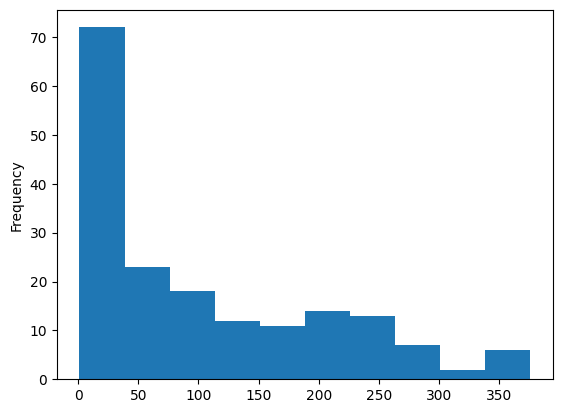

In [121]:
beers.plot.hist()

In [124]:
(beers.head(10) - beers.mean()).apply(lambda x: "low" if x<0 else "high")

,beer_servings
country,
Afghanistan,high
Albania,low
Algeria,low
Andorra,high
Angola,high
Antigua & Barbuda,low
Argentina,high
Armenia,low
Australia,high


In [127]:
(beers - beers.mean()).apply(lambda x: "low" if x<0 else "high").value_counts()

,count
beer_servings,
low,112
high,81


In [128]:
z_scores = (beers - beers.mean())/beers.std()
z_scores

,beer_servings
country,
Afghanistan,NaN
Albania,-0.137818
Algeria,-0.773712
Andorra,1.412174
Angola,1.133970
...,...
Venezuela,2.286528
Vietnam,0.080771
Yemen,-0.962493


In [130]:
z_scores.abs().max()

2.7137689844109123

In [134]:
beers.idxmax(), beers.idxmin()

('Namibia', 'Comoros')

In [135]:
beers["Namibia"]

np.float64(376.0)

In [136]:
beers.loc["Namibia"]

np.float64(376.0)